# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
from scipy.stats import kde

# ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
#            "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
#            "cyan","khaki","lightcoral","gray"]
ColorsII = []
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
ColorsI = ["red","blue","green","purple",'C1','navy','darkred']
ColorsII = ['darkred','purple','green','blue']

In [12]:
addressGev_LargeBox="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e7_90000/output////";
# addressGev_Midrange=".///Runs-28Jan2019/LCDM/1280Boxsize-LCDM///output/";
# addressGev_Smallrange=".///Runs-28Jan2019/LCDM/300Boxsize-LCDM////output/";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all=[]
Gev_lin_delta_m_zall=[]
Gev_lin_phi_zall=[]
Gev_lin_phi_prime_zall=[]
Rel_term=[]
Short_wave=[]
stress_tensor=[]
Cross=[]
# Gev_lin_phi_prime_zall
for i in range(zrange):
#     print(i)
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_delta_kess.dat"))
#     Rel_term.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_0_"+str(i).zfill(3)+"_RE_phi_prime_over_dtau.dat") )
    Short_wave.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_short_wave.dat") )
#     stress_tensor.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_0_"+str(i).zfill(3)+"_stress_tensor.dat") )
    Cross.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_deltakess_deltam.dat") )

    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_LargeBox+"/lcdm_pk_large_"+str(i).zfill(3)+"_chi.dat") )
# fld="./Kev-jev-files/jev-cs7-128-0d01///";

# zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001])
# zrange=np.shape(zlist)[0]
# Gev_fld_deltakess_z_all=[]
# Gev_fld_delta_m_zall=[]
# Gev_fld_phi_zall=[]
# Gev_fld_phi_prime_zall=[]
# # Class_all=[]
# # Class_pk_all=[]
# for i in range(zrange):
# #     print(i)
#     Gev_fld_deltakess_z_all.append(np.loadtxt("./"+fld+"/fld_pk"+str(i).zfill(3)+"_deltaclass.dat"))
# #     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/lcdm_pk_large_"+str(i).zfill(3)+"_zeta.dat") )
# #     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/lcdm_pk_large_"+str(i).zfill(3)+"_pi_k.dat") )
#     Gev_fld_delta_m_zall.append(np.loadtxt("./"+fld+"/fld_pk"+str(i).zfill(3)+"_deltacdm.dat") )
#     Gev_fld_phi_zall.append(np.loadtxt("./"+fld+"/fld_pk"+str(i).zfill(3)+"_phi.dat") )
#     Gev_fld_phi_prime_zall.append(np.loadtxt("./"+fld+"/fld_pk"+str(i).zfill(3)+"_phi_prime.dat") )
# #     Gev_lin_chi.append(np.loadtxt("./"+addressGev_LargeBox+"/lcdm_pk_large_"+str(i).zfill(3)+"_chi.dat") )

# # Backgrounds:
bg_kev= np.loadtxt("./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e7_90000/output/kess_cs_e7_w09_Hubble_background.dat")
# bg_kev= np.loadtxt("./Kev-jev-files/kev-cs7-128-0d01//kess_cs_0_background.dat")
bg_class=np.loadtxt("./Class_Gev_IC//class_cs2_07_w09/Output/class_kess_cs_e7_w_09_newt_background.dat")
# Class_all=[]
Class_phi_prime=[]
# # Class_pk_all=[]
# # zlist_class=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
# # zlist_class=zlist
zlist_class=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0])
Class_all=[]
Class_pk_nl_all=[]
zlist_phiprime=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 ,0.08, 0]
# class_high="./Class-HaloFit/class_kess_cs_e7_w_09_newt_haloz10_tk.dat";

for i in range(np.shape(zlist_class)[0]):
#     print(i+1)
#     Class_all.append(np.loadtxt(class_high+"/Class_kess_cs2_e7_w_09_z"+str(zlist_class[i])+"_newt.dat"))
    Class_all.append(np.loadtxt("./Class-HaloFit/class_kess_cs_e7_w_09_newt_haloz"+str(i+1)+"_tk.dat"))
#     Class_pk_nl_all.append(np.loadtxt(class_high+"/class_lcdm_z"+str(i+1)+"_pk_nl.dat"))
for i in range(np.shape(zlist_phiprime)[0]):

    Class_phi_prime.append(np.loadtxt("./Class-HaloFit/Kessence_field_class_phi_prime_z"+str(zlist_phiprime[i])+".dat"))
# maxNum=np.shape(zlist_class)[0]

# z_list=zlist_class

In [208]:
# stress_tensor[29][:20,1]
# # Short_wave[29][:20,1]

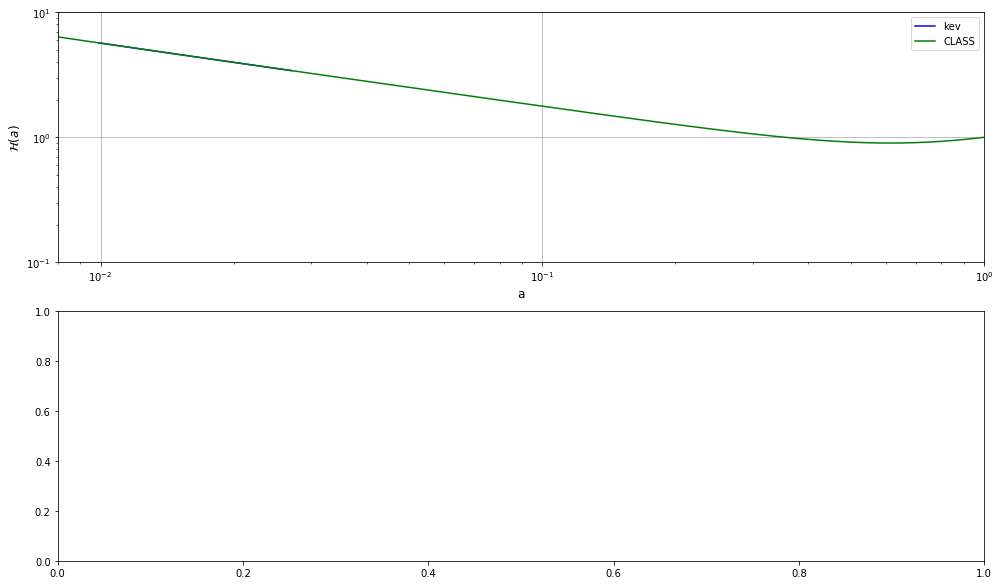

In [13]:
#################################
#################################
# Cosmological parameters.

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
H_list=[]
a_list=1./(1.+zlist)
Class_Phi_power_zall=[]

# H_list=(Hubble_conf_Mpc(1./(1.+zlist[i])))
aclass_cs_e3=1./(1+bg_class[:,0])
plt.figure(figsize=(14,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 13)
plt.subplot(211)
a=np.arange(0.001,2,0.0001)
k=127
# plt.loglog(bg_jev[:k,2],bg_jev[:k,3],color="red",label="fld")
plt.loglog(bg_kev[:k,2],bg_kev[:k,3],color="blue",label="kev")
plt.loglog(aclass_cs_e3,bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.),color="green",label="CLASS")

plt.xlim(8e-3,1)
plt.ylim(1e-1,10)
plt.xlabel("a",fontsize=12)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=12)
# plt.ylabel('log')
# plt.xlabel('log')

plt.legend()
plt.grid(True)
plt.tight_layout()

Hubble_interp=[]
# interp_Hubble=(interp1d(aclass_cs_e3[:],bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.)) )
# Hubble_interp=(interp_Hubble(bg_Gevolution_lin_LargeBox[:-10,2]) )
k=127
plt.subplot(212)
# plt.loglog(bg_jev[:k,2],np.abs(bg_kev[:k,3]-bg_jev[:k,3])/bg_jev[:k,3],color="red",label="fld-kev")
# plt.ylim(-1e-7,1e-7)

plt.show()

In [14]:
deltam_class=[]

phi_class=[]

deltakess_class=[]

phi_prime_class=[]
for i in range(0,zrange):
    interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )

    interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )

    interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,4]) )


#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

    deltam_class.append(interp_class_deltam(Gev_lin_delta_m_zall[i][:,0]))

    phi_class.append(interp_class_phi(Gev_lin_delta_m_zall[i][:,0]))

    deltakess_class.append(interp_class_deltakess(Gev_lin_delta_m_zall[i][:,0]))   
    
    
for i in range(0,np.shape(zlist_phiprime)[0]):
    interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,2]) )

    phi_prime_class.append(interp_class_phi_prime(Gev_lin_delta_m_zall[i][:,0]))


In [15]:
# np.shape(phi_class)
# a_list

Text(0,0.5,u'${P}_{ m}$')

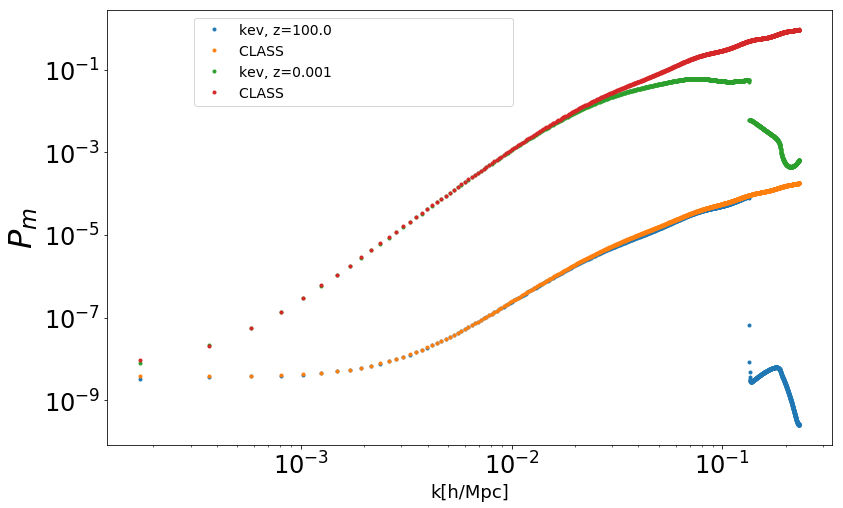

In [16]:
fig, axs = plt.subplots(1,1,figsize=(13,8), sharex=True)
plt.subplots_adjust(hspace=0)
kmax=31
l=0
for i in [0,29]:

# i=0
    Normlization=As*(Gev_lin_delta_m_zall[i][0:,0]/kp)**(ns-1.);
    Class_deltam_power=(deltam_class[i]**2)*Normlization;

    kh=Gev_lin_delta_m_zall[i][:,0];
#     jev=Gev_fld_delta_m_zall[i][:,1];
    Kev= Gev_lin_delta_m_zall[i][:,1];
#     jev= Gev_fld_delta_m_zall[i][0:,1]*(2. *np.pi **2)/(kh**3);

#     axs.plot(Gev_lin_delta_m_zall[i][0:,0],np.abs(Kev-jev)/jev,".",label="kev - jev, z="+str(z_list[i]))
    axs.plot(kh,(Kev),".",label="kev, z="+str(zlist[i])) 
#     axs.plot(Gev_lin_delta_m_zall[i][0:,0],jev,".",label="jev ")  
    axs.plot(Gev_lin_delta_m_zall[i][0:,0],Class_deltam_power,".",label="CLASS ")  

    l=l+1 
#     plt.axhline(0.025 ,label="2.5%" )
# plt.xlim(1.e-2,1.e-1)
axs.set_xscale("log")
axs.set_yscale("log")
axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.12, 0.88, 0.44, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=18)
axs.set_ylabel(r"${P}_{ m}$",fontsize=32)
# axs.set_title("Class halo fit power vs k-evolution")

Text(0,0.5,u'$\\Delta{P}_{\\delta m}/{P}_{\\delta m}$')

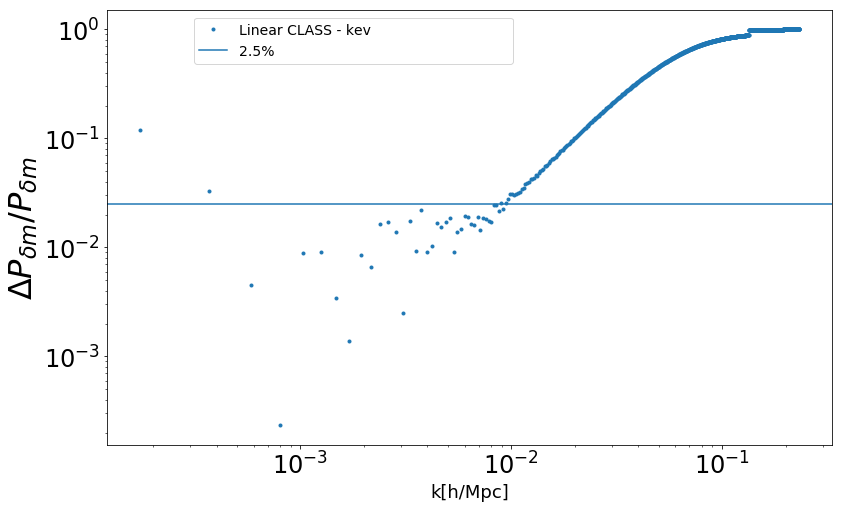

In [17]:
# H_list=(Hubble_conf_Mpc(1./(1.+zlist[i])))
fig, axs = plt.subplots(1,1,figsize=(13,8), sharex=True)
plt.subplots_adjust(hspace=0)
kmax=31
l=0
for i in [20]:

# i=0
    Normlization=As*(Gev_lin_delta_m_zall[i][0:,0]/kp)**(ns-1.);
    Class_deltam_power=(deltam_class[i]**2)*Normlization;

    kh=Gev_lin_delta_m_zall[i][:,0];
#     jev=Gev_fld_delta_m_zall[i][:,1];
    Kev= Gev_lin_delta_m_zall[i][:,1];
#     jev= Gev_fld_delta_m_zall[i][0:,1]*(2. *np.pi **2)/(kh**3);

#     axs.plot(Gev_lin_delta_m_zall[i][0:,0],np.abs(Kev-jev)/jev,".",label="kev - jev, z="+str(z_list[i]))
#     axs.plot(kh,np.abs(Kev-jev)/jev,".",label="kev - jev, z="+str(zlist[i])) 
    axs.plot(Gev_lin_delta_m_zall[i][0:,0],np.abs(Class_deltam_power-Kev)/Class_deltam_power,".",label="Linear CLASS - kev ")  

    l=l+1 
    plt.axhline(0.025 ,label="2.5%" )
# plt.xlim(1.e-2,1.e-1)
axs.set_xscale("log")
axs.set_yscale("log")
axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.12, 0.88, 0.44, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=18)
axs.set_ylabel(r"$\Delta{P}_{\delta m}/{P}_{\delta m}$",fontsize=32)
# axs.set_title("Class halo fit power vs k-evolution")

Text(0,0.5,u'${P}_{ kess}$')

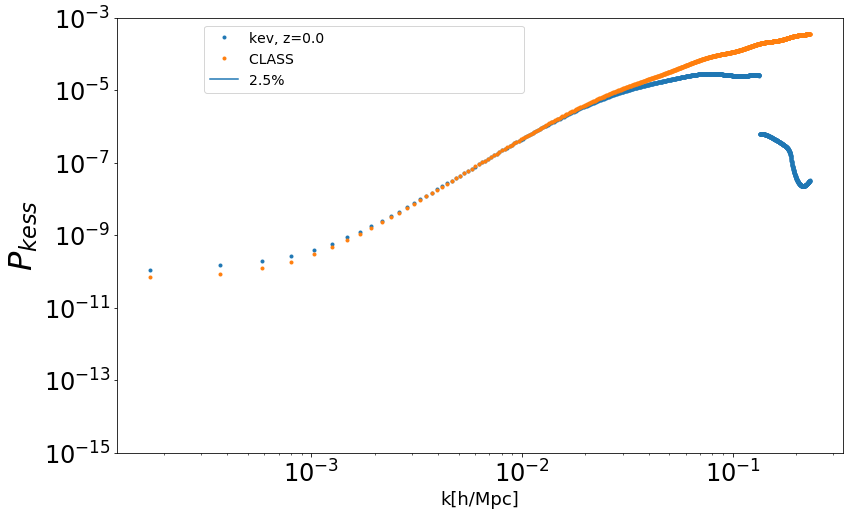

In [19]:
fig, axs = plt.subplots(1,1,figsize=(13,8), sharex=True)
plt.subplots_adjust(hspace=0)
kmax=31
l=0
for i in [30]:

# i=0
    Normlization=As*(Gev_lin_delta_m_zall[i][0:,0]/kp)**(ns-1.);
    Class_deltam_power=(deltakess_class[i]**2)*Normlization;

    kh=Gev_lin_delta_m_zall[i][:,0];
#     jev=Gev_fld_deltakess_z_all[i][:,1];
    Kev= Gev_lin_deltakess_z_all[i][:,1];
#     jev= Gev_fld_delta_m_zall[i][0:,1]*(2. *np.pi **2)/(kh**3);

#     axs.plot(Gev_lin_delta_m_zall[i][0:,0],np.abs(Kev-jev)/jev,".",label="kev - jev, z="+str(z_list[i]))
    axs.plot(kh,(Kev),".",label="kev, z="+str(zlist[i])) 
#     axs.plot(Gev_lin_delta_m_zall[i][0:,0],jev,".",label="jev ")  
    axs.plot(Gev_lin_delta_m_zall[i][0:,0],Class_deltam_power,".",label="CLASS ")  

    l=l+1 
    plt.axhline(0.025 ,label="2.5%" )
plt.ylim(1.e-15,1.e-3)
axs.set_xscale("log")
axs.set_yscale("log")
axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.12, 0.88, 0.44, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=18)
axs.set_ylabel(r"${P}_{ kess}$",fontsize=32)
# axs.set_title("Class halo fit power vs k-evolution")

Text(0,0.5,u'$ \\Delta{P}_{ kess}$')

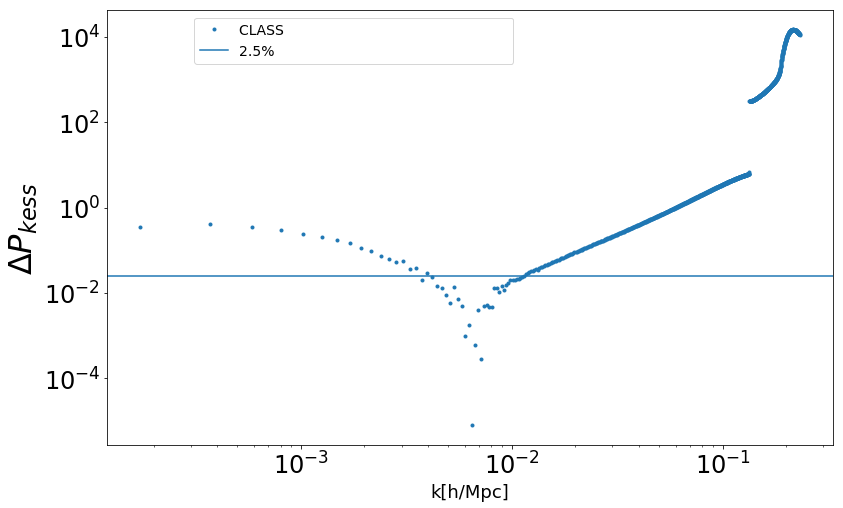

In [22]:
fig, axs = plt.subplots(1,1,figsize=(13,8), sharex=True)
plt.subplots_adjust(hspace=0)
kmax=31
l=0
for i in [30]:

# i=0
    Normlization=As*(Gev_lin_delta_m_zall[i][0:,0]/kp)**(ns-1.);
    Class_deltam_power=(deltakess_class[i]**2)*Normlization;

    kh=Gev_lin_delta_m_zall[i][:,0];
#     jev=Gev_fld_deltakess_z_all[i][:,1];
    Kev= Gev_lin_deltakess_z_all[i][:,1];
#     jev= Gev_fld_delta_m_zall[i][0:,1]*(2. *np.pi **2)/(kh**3);

#     axs.plot(Gev_lin_delta_m_zall[i][0:,0],np.abs(Kev-jev)/jev,".",label="kev - jev, z="+str(z_list[i]))
#     axs.semilogx(kh,np.abs(Kev-jev)/Kev,".",label="kev-jev, z="+str(zlist[i])) 
    axs.semilogx(Gev_lin_delta_m_zall[i][0:,0],np.abs(Class_deltam_power-Kev)/Kev,".",label="CLASS ")  

    l=l+1 
    plt.axhline(0.025 ,label="2.5%" )
# plt.ylim(1.e-15,1.e-3)
axs.set_xscale("log")
axs.set_yscale("log")
axs.tick_params(axis = 'both', which = 'major', labelsize = 24, labelcolor="black")
axs.legend(bbox_to_anchor=(0.12, 0.88, 0.44, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
axs.set_xlabel("k[h/Mpc]",fontsize=18)
axs.set_ylabel(r"$ \Delta{P}_{ kess}$",fontsize=32)
# axs.set_title("Class halo fit power vs k-evolution")

In [23]:
# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
Boxsize=9000;
mu_kev_phi=[]
mu_kev_kess=[]

mu_jev_phi=[]
mu_jev_kess=[]

mu_class_phi=[]
mu_class_kess=[]
Rel_term_all_kev=[]
Rel_term_all_jev=[]
short_wave_kev=[]
for i in range (zrange):
    #Kevolution
    phi_kev=np.sqrt(Gev_lin_phi_zall[i][:,1]) # phi in kevolution (+ according to CLASS transfer functions)
    phi_dot_kev= -np.sqrt(Gev_lin_phi_prime_zall[i][:,1]) # Phi' in kevolution (is negative according to CLASS)
    delta_m = -np.sqrt(Gev_lin_delta_m_zall[i][:,1]) # (Negative according to CLASS )
    deltakess= -np.sqrt(Gev_lin_deltakess_z_all[i][:,1]) #(Negative accrding to CLASS)
    # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
    Rel_term = -2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_kev + phi_kev)/delta_m
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    Rel_term_all_kev.append(Rel_term);
    mu_kev0=  1.+ (coeff*deltakess/delta_m) #+ Rel_term ; 
    mu_kev_kess.append(mu_kev0)
    #Short wave
    short_wave=-2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (np.sqrt(Short_wave[i][:,1]))/(3.0 *Hubble_conf_Mpc(a_list[i])**2* delta_m)
    short_wave_kev.append(short_wave)
    #Jevolution
#     phi_jev= np.sqrt(Gev_lin_phi_zall[i][:,1]) # phi in jev (+ according to CLASS transfer functions)
#     phi_dot_jev= -np.sqrt(Gev_fld_phi_prime_zall[i][:,1]) # Phi' in jev (is negative according to CLASS)
#     delta_m_jev = -np.sqrt(Gev_fld_delta_m_zall[i][:,1]) # (Negative according to CLASS )
#     deltakess_jev= -np.sqrt(Gev_fld_deltakess_z_all[i][:,1]) #(Negative accrding to CLASS)
#     # Reltivistic term = -2 * (1+ Omegakess/Omegam) (Phi'/Hconf +  Phi)/( deltam)
#     Rel_term = -2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_dot_jev + phi_jev)/delta_m_jev  
#     Rel_term_all_jev .append(Rel_term);

#     coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     mu_jev0=  1.+ (coeff*deltakess_jev/delta_m_jev) + Rel_term ; 
#     mu_jev_kess.append(mu_jev0)
    #CLASS
    # Only at z=0.08 Rel effects
    phi_prime_class_rel =phi_prime_class[10][:]  # Only at some redshifts not all of them Check zlist_phiprime
    phi_class_rel=phi_class[i][:];
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    Rel_class_z0d08 = -2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:]  
    phi_prime_class_rel =phi_prime_class[1][:]  # Only at some redshifts not all of them Check zlist_phiprime
    Rel_class_z10 = -2 * (1 + a_list[i]**(-3.*w)*Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:]    

    mu_class0=1.+(coeff*deltakess_class[i][:]/deltam_class[i][:]) #+ Rel_class_z0d08;
    mu_class_kess.append(mu_class0);

    ###############
    ###############Mu 2
    ###############
    #Kevolution
#     coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    coeff=2. * (1.0 +a_list[i]**(-3.*w)*Omega_kessence/Omega_m) /(3.*Hubble_conf_Mpc(a_list[i])**2 )
    mu_kev0=coeff * Gev_lin_phi_zall[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,1])
    mu_kev_phi.append(mu_kev0)
    #Jevolution
    
#     coeff=2. * (1.0 +a_list[i]**(-3.*w)*Omega_kessence/Omega_m) /(3.*Hubble_conf_Mpc(a_list[i])**2 )
#     mu_jev0=coeff * Gev_lin_phi_zall[i][:,0]**2 * np.sqrt(Gev_fld_phi_zall[i][:,1]/Gev_fld_delta_m_zall[i][:,1])
#     mu_jev_phi.append(mu_jev0)
    #CLASS
    coeff=2. * (1.0 +a_list[i]**(-3.*w)*Omega_kessence/Omega_m) /(3.*Hubble_conf_Mpc(a_list[i])**2 )
    mu_class0=-coeff * Gev_lin_phi_zall[i][:,0]**2 * phi_class[i][:]/deltam_class[i][:]
    mu_class_phi.append(mu_class0);
    
    

In [234]:
# Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
# Omega_m=Omega_b + Omega_cdm;
# Omega_rad=9.1671353942930788e-05
# Omega_kessence=1.-Omega_m-Omega_rad
# Boxsize=9000;
# G= 6.6* 10**-11
# plt.figure(figsize=(16,8))
# for i in [29]:
#     rho_crit =(3.*Hubble_conf_Mpc(a_list[i])**2 )/(8.0 * np.pi * G) 
#     coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     delta_m = -np.sqrt(Gev_lin_delta_m_zall[i][:,1]) # (Negative according to CLASS )
#     deltakess= -np.sqrt(Gev_lin_deltakess_z_all[i][:,1]) #(Negative accrding to CLASS)
#     cross_cor=np.sqrt(Cross[i][:,1])
# #     plt.loglog(Short_wave[i][:,0],Short_wave[i][:,1]/stress_tensor[i][:,1],label="z="+np.str(zlist[i]))
# #     plt.loglog(Short_wave[i][:,0],Short_wave[i][:,1],label="z="+np.str(zlist[i]))
#     plt.plot(Short_wave[i][:,0],np.sqrt(stress_tensor[i][:,1])*(a_list[i]**3)*(0.225),label="z="+np.str(zlist[i]))
#     plt.plot(Short_wave[i][:,0],-a_list[i]**(-3)*rho_crit*(Omega_m*delta_m+ Omega_kessence*a_list[i]**(-3.*w)*deltakess- 0.0*np.sqrt(Omega_m*Omega_kessence)*cross_cor) ,label="z="+np.str(zlist[i]))

# plt.legend()

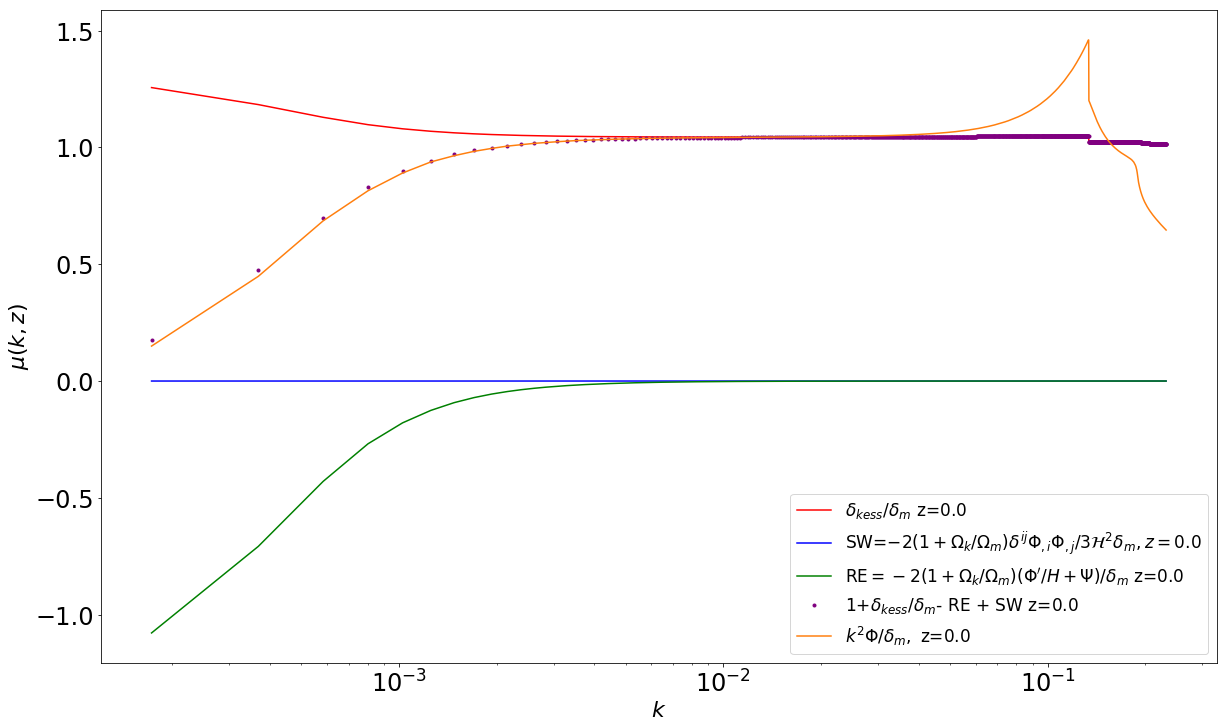

In [33]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in [30]:
    #kevolution
    plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_kess[i][:],"-",color=ColorsI[l],lw=1.5, label=r"$ \delta_{kess}/\delta_m$ z="+str(zlist[i]))
    plt.semilogx(Gev_lin_phi_zall[i][:,0], short_wave_kev[i][:],"-",color=ColorsI[l+1],lw=1.5, label=r"SW=$-2 (1+ \Omega_k/\Omega_m) \delta^{ij} \Phi_{,i}  \Phi_{,j}/{3 \mathcal{H}^2\delta_m}, z=$"+str(zlist[i]))
    plt.semilogx(Gev_lin_phi_zall[i][:,0], -Rel_term_all_kev[i][:],"-",color=ColorsI[l+2],lw=1.5, label=r"RE$=-2 (1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$ z="+str(zlist[i]))
    plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_kess[i][:]-Rel_term_all_kev[i][:]+short_wave_kev[i][:],".",color=ColorsI[l+3],lw=1.5, label=r"1+$ \delta_{kess}/\delta_m$- RE + SW z="+str(zlist[i]))
    plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_phi[i][:]*h*h,"-",color=ColorsI[l+4],linestyle='solid',lw=1.5, label=r"$k^2\Phi/\delta_m,$ z="+str(zlist[i]))
#     #gevolution9
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_jev_kess[i][:]-Rel_term_all_jev[i][:],".",color=ColorsI[l],lw=2.5, label=r"jev, 1+$\delta_{kess}/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_jev_phi[i][:]*h*h,"-",color=ColorsI[l],linestyle='solid',lw=2.5, label=r"$jev, \Phi/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_jev_kess[i][:]-Rel_term_all_jev[i][:],".",color=ColorsI[l],lw=2.5, label=r"jev, 1+$\delta_{kess}/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_jev_kess[i][:],"-.",color=ColorsI[l+1],lw=2.5, label=r"jev, 1+$\delta_{kess}/\delta_m$ z="+str(zlist[i]))

    #     CLASS
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_class_kess[i][:],"-",color=ColorsI[l+2],lw=2.5, label=r"CLASS, 1+$\delta_{kess}/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_class_kess[i][:]-Rel_class_z10,"-",color=ColorsI[l+2],lw=2.5, label=r"CLASS, 1+$\delta_{kess}/\delta_m  +2 (1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$  z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_class_phi[i][:]*h*h,"-",color=ColorsI[l+1],linestyle='solid',lw=2.5, label=r"CLASS, $\Phi/\delta_m$ z="+str(zlist[i]))

    l=l+1
plt.ylabel(r"$\mu(k,z)$",fontsize=22)
plt.xlabel(r"$k$",fontsize=22)

plt.legend(fontsize=17)
# plt.ylim(1.0,1.08)
plt.show()
    



In [222]:
# plt.loglog(Gev_lin_phi_zall[i][:,0], short_wave_kev[i][:],"o",color=ColorsI[l],lw=1.5, label=r"kev, 1+$ \delta_{kess}/\delta_m-2 (1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$+SW, z="+str(zlist[i]))


# Short_wave corrections

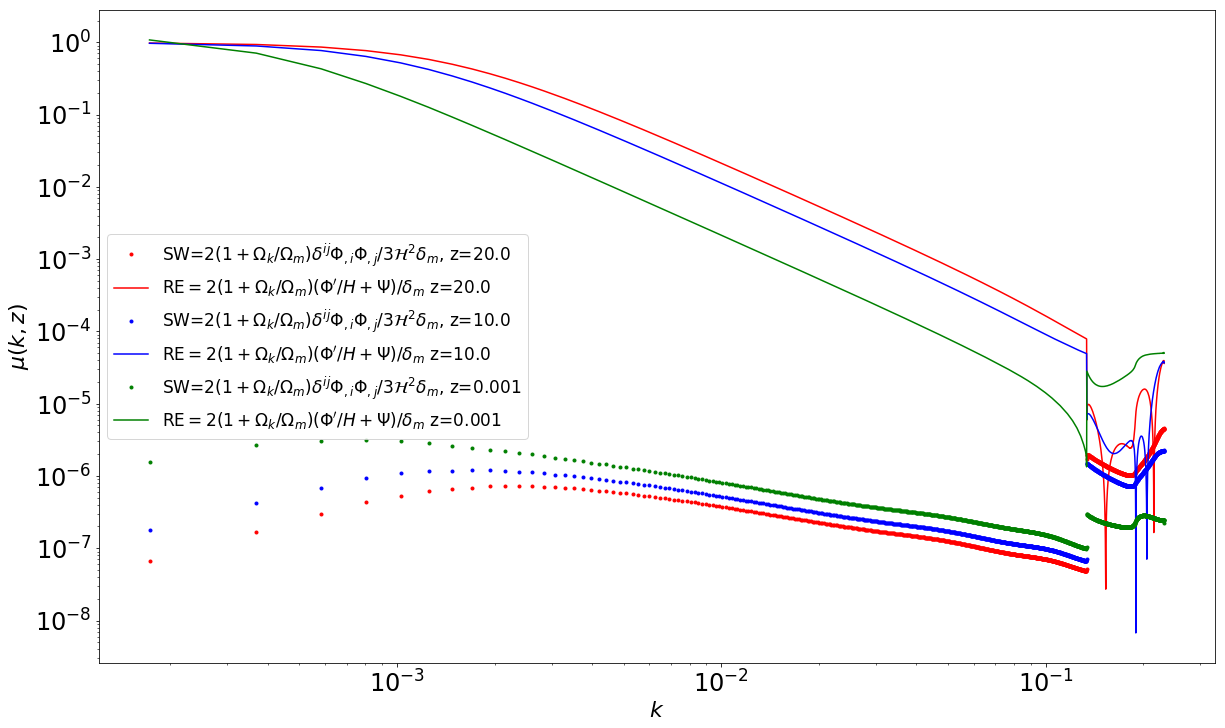

In [25]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in [2,3,29]:
    #kevolution
    plt.loglog(Gev_lin_phi_zall[i][:,0],(short_wave_kev[i][:]),".",color=ColorsI[l],lw=1.5, label=r"SW=$2 (1+ \Omega_k/\Omega_m) \delta^{ij} \Phi_{,i}  \Phi_{,j}/{3 \mathcal{H}^2\delta_m}$, z="+str(zlist[i]))
    plt.loglog(Gev_lin_phi_zall[i][:,0], np.abs(Rel_term_all_kev[i][:]),"-",color=ColorsI[l],lw=1.5, label=r"RE$=2 (1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_phi[i][:]*h*h,".",color=ColorsI[l+1],linestyle='solid',lw=2.5, label=r"$kev, \Phi/\delta_m$ z="+str(zlist[i]))

    l=l+1
plt.ylabel(r"$\mu(k,z)$",fontsize=22)
plt.xlabel(r"$k$",fontsize=22)

plt.legend(fontsize=17)
# plt.ylim(1.0,1.08)
plt.show()
    

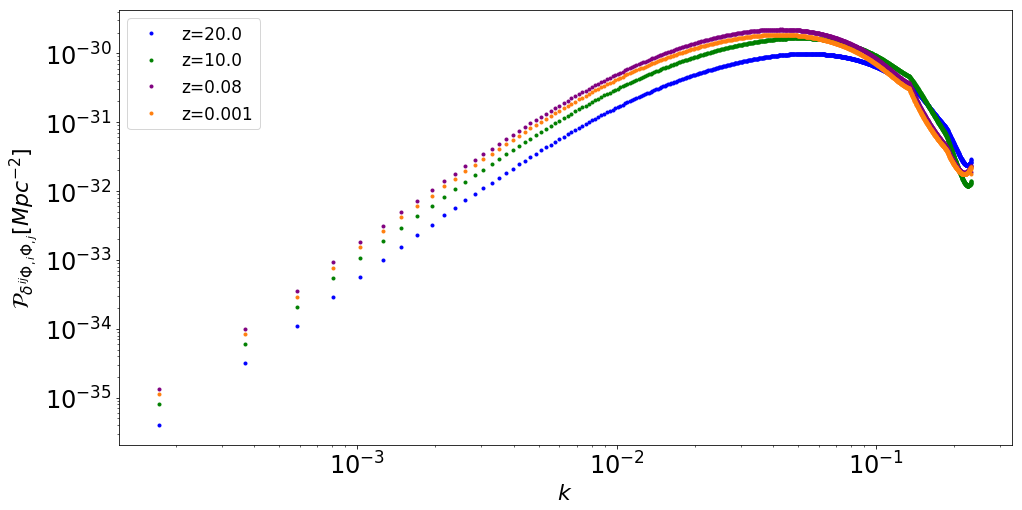

In [26]:

plt.figure(figsize=(16,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in [2,3,20,29]:
    #kevolution
    plt.loglog(Gev_lin_phi_zall[i][:,0],(Short_wave[i][:,1]),".",color=ColorsI[l+1],lw=2.5, label=r"z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_kess[i][:]-Rel_term_all_kev[i][:],".",color=ColorsI[l],lw=2.5, label=r"kev, 1+$ \delta_{kess}/\delta_m-2 (1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_phi[i][:]*h*h,".",color=ColorsI[l+1],linestyle='solid',lw=2.5, label=r"$kev, \Phi/\delta_m$ z="+str(zlist[i]))

    l=l+1
plt.ylabel(r"$ \mathcal{P}_{\delta^{ij} \Phi_{,i}  \Phi_{,j}} [Mpc^{-2}]$",fontsize=22)
plt.xlabel(r"$k$",fontsize=22)

plt.legend(fontsize=17)
# plt.ylim(1.0,1.08)
plt.show()
    

# Relativitic term importance in k-evolution

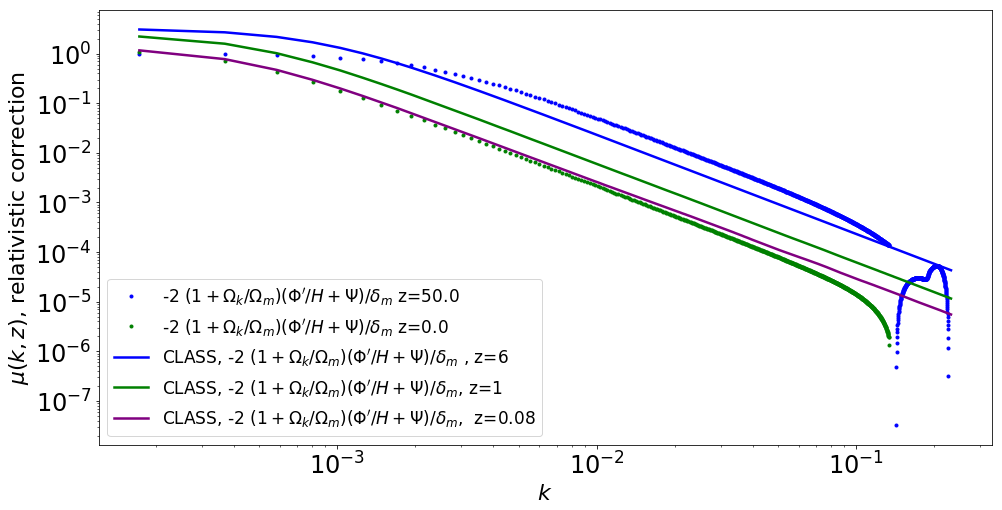

In [30]:
plt.figure(figsize=(16,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in [1,30]:
    #kevolution
    plt.loglog(Gev_lin_phi_zall[i][:,0], Rel_term_all_kev[i][:],".",color=ColorsI[l+1],lw=2.5, label=r"-2 $(1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$ z="+str(zlist[i]))

    l=l+1
l=0
plt.loglog(Gev_lin_phi_zall[i][:,0], Rel_class_z6,"-",color=ColorsI[l+1],lw=2.5, label=r"CLASS, -2 $(1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$ , z=6 ")
l=l+1
plt.loglog(Gev_lin_phi_zall[i][:,0], Rel_class_z1,"-",color=ColorsI[l+1],lw=2.5, label=r"CLASS, -2 $(1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$, z=1 ")
l=l+1
plt.loglog(Gev_lin_phi_zall[i][:,0], Rel_class_z0d08,"-",color=ColorsI[l+1],lw=2.5, label=r"CLASS, -2 $(1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$,  z=0.08")

plt.ylabel(r"$\mu(k,z)$, relativistic correction",fontsize=22)
plt.xlabel(r"$k$",fontsize=22)

plt.legend(fontsize=17)
# plt.ylim(1.0,1.05)
plt.show()
    



# Making CLASS relativistic corrections since we have only phi' at certain redshifts!

In [31]:
print(zlist_class[20],zlist_phiprime[10])
i=20;
phi_prime_class_rel =phi_prime_class[10][:]  # Only at some redshifts not all of them Check zlist_phiprime
phi_class_rel=phi_class[i][:];
coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
Rel_class_z0d08 = -2 * (1 + Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:] ;
###########
print(zlist_class[9],zlist_phiprime[9])
i=9;
phi_prime_class_rel =phi_prime_class[9][:]  # Only at some redshifts not all of them Check zlist_phiprime
phi_class_rel=phi_class[i][:];
coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
Rel_class_z1 = -2 * (1 + Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:] ;
########
print(zlist_class[4],zlist_phiprime[4])
i=4;
phi_prime_class_rel =phi_prime_class[4][:]  # Only at some redshifts not all of them Check zlist_phiprime
phi_class_rel=phi_class[i][:];
coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
Rel_class_z6 = -2 * (1 + Omega_kessence/Omega_m)* (phi_prime_class_rel + phi_class_rel)/deltam_class[i][:] ;


(0.080000000000000002, 0.08)
(1.0, 1)
(6.0, 6)


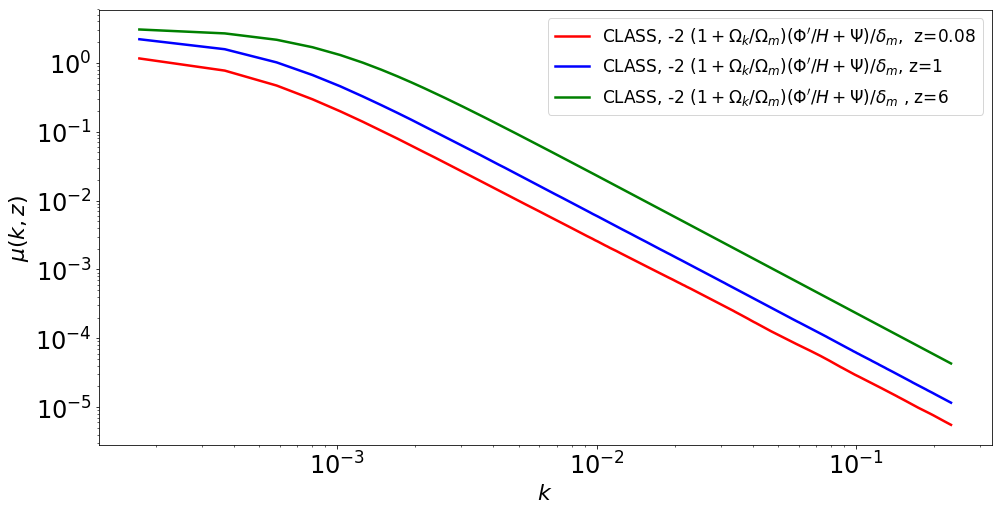

In [32]:
plt.figure(figsize=(16,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
# for i in [29]:
    #kevolution
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_kess[i][:],".",color=ColorsI[l+1],lw=2.5, label=r"kev, 1+$ \delta_{kess}/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_kev_phi[i][:]*h*h,".",color=ColorsI[l+1],linestyle='solid',lw=2.5, label=r"$kev, \Phi/\delta_m$ z="+str(zlist[i]))
#     #gevolution9
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_jev_kess[i][:],".",color=ColorsI[l+2],lw=2.5, label=r"jev, 1+$\delta_{kess}/\delta_m$ z="+str(zlist[i]))
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_jev_phi[i][:]*h*h,"-",color=ColorsI[l+3],linestyle='solid',lw=2.5, label=r"$jev, \Phi/\delta_m$ z="+str(zlist[i]))
#     CLASS
#     plt.semilogx(Gev_lin_phi_zall[i][:,0], mu_class_kess[i][:],"-",color=ColorsI[l],lw=2.5, label=r"CLASS, 1+$\delta_{kess}/\delta_m$ z="+str(zlist[i]))
plt.loglog(Gev_lin_phi_zall[i][:,0], Rel_class_z0d08,"-",color=ColorsI[l],lw=2.5, label=r"CLASS, -2 $(1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$,  z=0.08")
plt.loglog(Gev_lin_phi_zall[i][:,0], Rel_class_z1,"-",color=ColorsI[l+1],lw=2.5, label=r"CLASS, -2 $(1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$, z=1 ")
plt.loglog(Gev_lin_phi_zall[i][:,0], Rel_class_z6,"-",color=ColorsI[l+2],lw=2.5, label=r"CLASS, -2 $(1+ \Omega_k/\Omega_m)(\Phi'/H+\Psi)/\delta_m$ , z=6 ")

# l=l+1
plt.ylabel(r"$\mu(k,z)$",fontsize=22)
plt.xlabel(r"$k$",fontsize=22)

plt.legend(fontsize=17)
# plt.ylim(1.0,1.05)
plt.show()
    



# Non-relativistic mu

In [ ]:
# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad

mu_kev_phi=[]
mu_kev_kess=[]

mu_jev_phi=[]
mu_jev_kess=[]

mu_class_phi=[]
mu_class_kess=[]
for i in range (zrange):
    #Kevolution
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_kev0=  1.+ np.abs(coeff*np.sqrt(Gev_lin_deltakess_z_all[i][:,1])/np.sqrt(Gev_lin_delta_m_zall[i][:,1]))
    mu_kev_kess.append(mu_kev0)
    #Jevolution
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_jev0=  1.+ np.abs(coeff*np.sqrt(Gev_fld_deltakess_z_all[i][:,1])/np.sqrt(Gev_fld_delta_m_zall[i][:,1]))
    mu_jev_kess.append(mu_jev0)
    #CLASS
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*deltakess_class[i][:]/deltam_class[i][:])
    mu_class_kess.append(mu_class0);

    ###############
    ###############Mu 2
    ###############
    #Kevolution
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu_kev0=  coeff * Gev_lin_phi_zall[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,1])
    mu_kev_phi.append(mu_kev0)
    #Jevolution
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu_jev0=  coeff * Gev_lin_phi_zall[i][:,0]**2 * np.sqrt(Gev_fld_phi_zall[i][:,1]/Gev_fld_delta_m_zall[i][:,1])
    mu_jev_phi.append(mu_jev0)
    #CLASS
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu_class0=-coeff * Gev_lin_phi_zall[i][:,0]**2 * phi_class[i][:]/deltam_class[i][:]
    mu_class_phi.append(mu_class0);
    
    

# 